In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

# Reading data for 3 resolutions

Muninn format

In [6]:
datatime=[]
datagrid=[]
dataderuxchi=[]
dataderxchi=[]
dataxchi=[]
vars=["deruxchi", "derxchi", "xchi"]
res=[1,2,3]
for resolution in res:


    time=[]
    grid=[]
    deruxchi=[]
    derxchi=[]
    xchi=[]
    k=1

    for var in vars:
        dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res{}/{}.txt".format(resolution,var)
        
        print(dir)

        with open(dir) as f:
            for line in f:

                index = line.find("Time")
                if index==1:
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]
                

                else:
                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))
                    elif a==[]:
                        grid.append(auxgrid)
                        if k==1:
                            deruxchi.append(auxdata)
                        elif k==2:
                            derxchi.append(auxdata)
                        elif k==3:
                            xchi.append(auxdata)
                    
        k=k+1


    datatime.append(time)
    datagrid.append(grid)
    dataderuxchi.append(deruxchi)
    dataderxchi.append(derxchi)
    dataxchi.append(xchi)
#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res1/deruxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res1/derxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res1/xchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res2/deruxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res2/derxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res2/xchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res3/deruxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res3/derxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/muninnDATA/res3/xchi.txt


In [7]:
datatime[0][10]

0.1

In [8]:
len(datagrid[0][0])

207

In [9]:
print(len(dataxchi[0]))
print(len(dataderuxchi[0]))
print(len(dataderxchi[0]))

301
301
301


####

In [10]:
print(dataxchi[0][0][1]) # datam indexes give res, time then gridpoint

0.0


In [11]:
L=len(dataxchi[0][0])-6 # grid length without the ghostpoints
dx=datagrid[0][0][1]-datagrid[0][0][0]

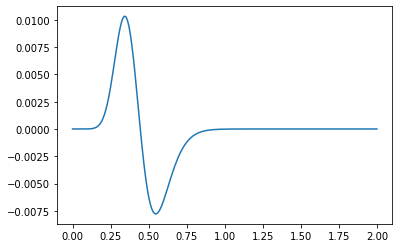

In [12]:
#plt_x1 = np.linspace(0, 1, L)
#plt_x2 = np.linspace(0, 1, 2*L-1)
#plt_x3 = np.linspace(0, 1, 4*L-3)
t=0
plt_x1 = datagrid[0][t][3:len(datagrid[0][0])-3]
plt_x2 = datagrid[1][t*2][3:len(datagrid[1][0])-3]
plt_x3 = datagrid[2][t*3][3:len(datagrid[2][0])-3]

plt.plot(plt_x1,dataderuxchi[0][0][3:len(dataderuxchi[0][0])-3])
#plt.plot(plt_x2,datam[1][0][3:len(datam[1][0])-3])
#plt.plot(plt_x3,datam[2][0][3:len(datam[2][0])-3])

# Styling plots

In [13]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Plotting data with resolutions 1 and 2 and differences 

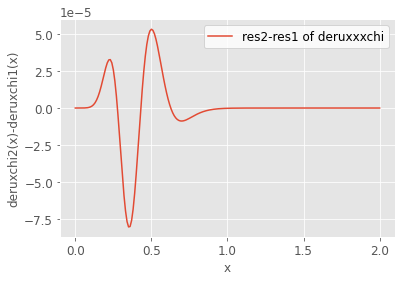

In [14]:
# for given t
t1=0 #last timestep
t2=2*t1
t3=4*t1
auxderuxchi = []
auxderxchi = []
auxxchi = []
auxgrid = []

for i in range(len(dataderuxchi[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(dataderuxchi[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        auxderuxchi.append(dataderuxchi[1][t2][i])
        auxderxchi.append(dataderxchi[1][t2][i])
        auxxchi.append(dataxchi[1][t2][i])
        auxgrid.append(datagrid[1][t2][i])
        #print(datam[1][0][i])

        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(dataderuxchi[0][t1][3:len(dataderuxchi[0][t1])-3],auxderuxchi))
diffs_2_1.append(np.subtract(dataderxchi[0][t1][3:len(dataderxchi[0][t1])-3],auxderxchi))
diffs_2_1.append(np.subtract(dataxchi[0][t1][3:len(dataxchi[0][t1])-3],auxxchi))

with plt.style.context('ggplot'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of deruxxxchi')

plt.legend()
plt.xlabel('x')
plt.ylabel('deruxchi2(x)-deruxchi1(x)')
plt.show()


In [15]:

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)



# Pointwise convergence tests: plots for thesis project report 

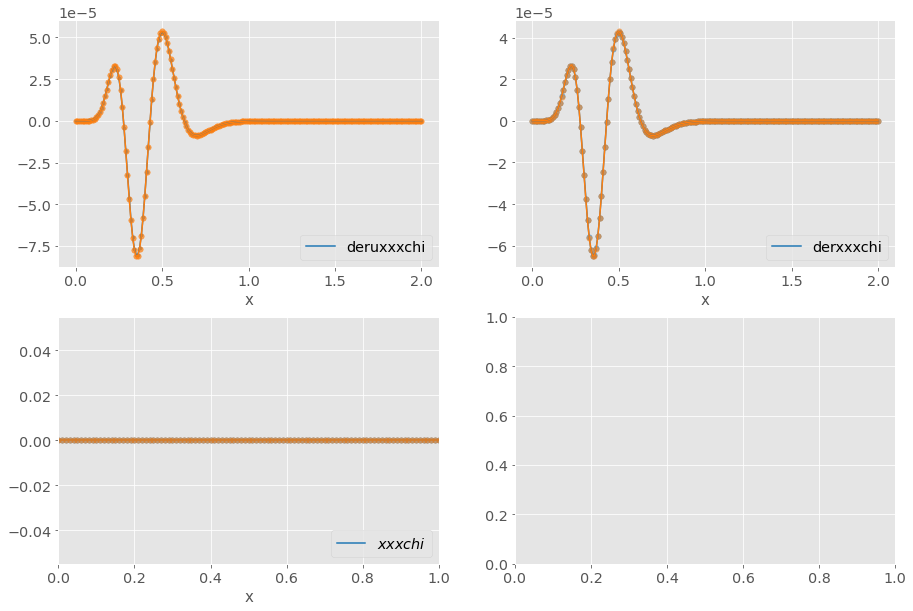

In [16]:
# for given t

aux2deruxchi = []
aux2derxchi = []
aux2xchi = []

for i in range(len(dataderuxchi[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(dataderuxchi[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2deruxchi.append(dataderuxchi[2][t3][i])
        aux2derxchi.append(dataderxchi[2][t3][i])
        aux2xchi.append(dataxchi[2][t3][i])

        


#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(auxderuxchi,aux2deruxchi))
diffs_4_2.append(np.subtract(auxderxchi,aux2derxchi))
diffs_4_2.append(np.subtract(auxxchi,aux2xchi))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))
   
    
    ax[0][0].plot(plt_x1, (diffs_2_1[0]), label='deruxxxchi',color='#1f77b4')
    ax[0][0].plot(plt_x1, (diffs_4_2[0])*4, color='#ff7f0e')
    ax[0][0].scatter(plt_x1, (diffs_2_1[0]),alpha=0.7,s=10,color='#1f77b4')
    ax[0][0].scatter(plt_x1, (diffs_4_2[0])*4,alpha=0.7,s=30,color='#ff7f0e')
    ax[0][0].set_xlabel('x',fontsize=15)
    #ax[0][0].set_xlim([0,0.1])
    ax[0][0].legend(loc='lower right')
    
    ax[0][1].plot(plt_x1, (diffs_2_1[1]), label='derxxxchi',color='#1f77b4')
    ax[0][1].plot(plt_x1, (diffs_4_2[1])*4, color='#ff7f0e')
    ax[0][1].scatter(plt_x1, (diffs_2_1[1]),alpha=0.5,s=30,color='#1f77b4')
    ax[0][1].scatter(plt_x1, (diffs_4_2[1])*4,alpha=0.5,s=30,color='#ff7f0e')
    ax[0][1].set_xlabel('x',fontsize=15)
    #ax[0][1].set_xlim([0, 0.05])
    #ax[0][1].set_ylim([0, 1*10**(-11)])
    ax[0][1].legend(loc='lower right')
    
    ax[1][0].plot(plt_x1, (diffs_2_1[2]), label='$xxxchi$',color='#1f77b4')
    ax[1][0].plot(plt_x1, (diffs_4_2[2])*4, color='#ff7f0e')
    ax[1][0].set_xlabel('x',fontsize=15)
    ax[1][0].scatter(plt_x1, (diffs_2_1[2]),alpha=0.5,s=30,color='#1f77b4')
    ax[1][0].scatter(plt_x1, (diffs_4_2[2])*4,alpha=0.5,s=30,color='#ff7f0e')
    ax[1][0].set_xlim([0, 1])
    ax[1][0].legend(loc='lower right')
    



plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

plt.show()



# L2 norm convergence tests

In [17]:
#for the first time step

norm_low_med = []
norm_med_high = []

for j in range(3):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

print("deruxxxchi convergence factor:")
print(math.log2(norm_low_med[0]/norm_med_high[0]))
print("")

print("derxxxchi convergence factor:")
print(math.log2(norm_low_med[1]/norm_med_high[1]))
print("")

print("xxxchi convergence factor:")
print(math.log2(norm_low_med[2]/norm_med_high[2]))
print("")

deruxxxchi convergence factor:
1.9908302853027033

derxxxchi convergence factor:
1.997296642259724

xxxchi convergence factor:
nan



/tmp/ipykernel_7471/2231725298.py:25: RuntimeWarning: invalid value encountered in scalar divide
  print(math.log2(norm_low_med[2]/norm_med_high[2]))


# Q(t)

In [18]:
final_t=len(datatime[2])
final_t

1201

In [23]:
rsquarednorm=True

using evol variables deruxchi xchi

/tmp/ipykernel_7471/2872093076.py:72: RuntimeWarning: invalid value encountered in scalar divide
  Q_xchi.append(math.log2(norm_low_med[1]/norm_med_high[1]))


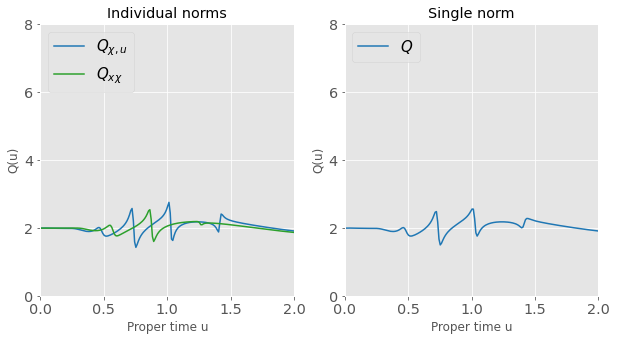

In [39]:
"""from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))"""

Q_deruxchi = []
Q_xchi = []
Q= []


for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxderuxchi = []
    auxxchi = []

    for i in range(len(dataderuxchi[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxderuxchi.append(dataderuxchi[1][t2][i])
            auxxchi.append(dataxchi[1][t2][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(dataderuxchi[0][t1][3:len(dataderuxchi[0][t1])-3],auxderuxchi))
    diffs_2_1.append(np.subtract(dataxchi[0][t1][3:len(dataxchi[0][t1])-3],auxxchi))

    # for given t

    aux2deruxchi = []
    aux2xchi = []
    for i in range(len(dataderuxchi[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2deruxchi.append(dataderuxchi[2][t3][i])
            aux2xchi.append(dataxchi[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxderuxchi,aux2deruxchi))
    diffs_4_2.append(np.subtract(auxxchi,aux2xchi))


    ####

    norm_low_med = []
    norm_med_high = []
    single_norm_low_med = []
    single_norm_med_high = []
    s_a=0
    s_b=0

    for j in range(2):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
            s_a += i**2
        for i in diffs_4_2[j]:
            b += i**2
            s_b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    single_norm_low_med=np.sqrt(s_a)
    single_norm_med_high=np.sqrt(s_b)
    
    Q_deruxchi.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_xchi.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q.append(math.log2(single_norm_low_med/single_norm_med_high))
    ####
    
plt_x = np.linspace(0, 3, len(Q_deruxchi))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    
    ax[0].plot(plt_x, Q_deruxchi, label = '$Q_{\chi{,u}}$',color='#1f77b4')
    ax[0].plot(plt_x, Q_xchi, label = '$Q_{x \chi}$',color='#2ca02c')
    
    ax[0].set_ylim([0,8])
    ax[0].set_xlim([0,2])
    ax[0].legend(loc ="upper left",fontsize=15)
    ax[0].set_xlabel('Proper time u')
    ax[0].set_ylabel('Q(u)')
    ax[0].set_title('Individual norms')
    
    
    ax[1].plot(plt_x, Q, label = '$Q$',color='#1f77b4')
    #ax[1].plot(x100, Q100, linestyle='dotted',alpha=0.7,color='#1f77b4')
    ax[1].set_ylim([0,8])
    ax[1].set_xlim([0,2])
    ax[1].legend(loc ="upper left",fontsize=15)
    ax[1].set_title('Single norm')
    #plt.xticks(rotation=45)
    ax[1].set_xlabel('Proper time u')
    ax[1].set_ylabel('Q(u)')

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_7471/2475737060.py:80: RuntimeWarning: invalid value encountered in scalar divide
  Q_xchi.append(math.log2(norm_low_med[2]/norm_med_high[2]))


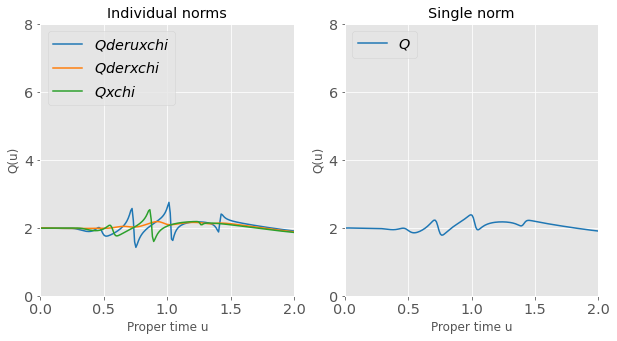

In [30]:
"""from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))"""

Q_deruxchi = []
Q_derxchi = []
Q_xchi = []
Q= []


for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxderuxchi = []
    auxderxchi = []
    auxxchi = []

    for i in range(len(dataderuxchi[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxderuxchi.append(dataderuxchi[1][t2][i])
            auxderxchi.append(dataderxchi[1][t2][i])
            auxxchi.append(dataxchi[1][t2][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(dataderuxchi[0][t1][3:len(dataderuxchi[0][t1])-3],auxderuxchi))
    diffs_2_1.append(np.subtract(dataderxchi[0][t1][3:len(dataderxchi[0][t1])-3],auxderxchi))
    diffs_2_1.append(np.subtract(dataxchi[0][t1][3:len(dataxchi[0][t1])-3],auxxchi))

    # for given t

    aux2deruxchi = []
    aux2derxchi = []
    aux2xchi = []
    for i in range(len(dataderuxchi[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2deruxchi.append(dataderuxchi[2][t3][i])
            aux2derxchi.append(dataderxchi[2][t3][i])
            aux2xchi.append(dataxchi[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxderuxchi,aux2deruxchi))
    diffs_4_2.append(np.subtract(auxderxchi,aux2derxchi))
    diffs_4_2.append(np.subtract(auxxchi,aux2xchi))


    ####

    norm_low_med = []
    norm_med_high = []
    single_norm_low_med = []
    single_norm_med_high = []
    s_a=0
    s_b=0

    for j in range(3):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
            s_a += i**2
        for i in diffs_4_2[j]:
            b += i**2
            s_b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    single_norm_low_med=np.sqrt(s_a)
    single_norm_med_high=np.sqrt(s_b)
    
    Q_deruxchi.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_derxchi.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_xchi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q.append(math.log2(single_norm_low_med/single_norm_med_high))
    ####
    
plt_x = np.linspace(0, 3.0, len(Q_deruxchi))
#plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    
    ax[0].plot(plt_x, Q_deruxchi, label = '$Q deruxchi$',color='#1f77b4')
    ax[0].plot(plt_x, Q_derxchi, label = '$Q derxchi$',color='#ff7f0e')
    ax[0].plot(plt_x, Q_xchi, label = '$Q xchi$',color='#2ca02c')
    
    ax[0].set_ylim([0,8])
    ax[0].set_xlim([0,2])
    ax[0].legend(loc ="upper left")
    ax[0].set_xlabel('Proper time u')
    ax[0].set_ylabel('Q(u)')
    ax[0].set_title('Individual norms')
    
    
    ax[1].plot(plt_x, Q, label = '$Q$',color='#1f77b4')
    #ax[1].plot(x100, Q100, linestyle='dotted',alpha=0.7,color='#1f77b4')
    ax[1].set_ylim([0,8])
    ax[1].set_xlim([0,2])
    ax[1].legend(loc ="upper left")
    ax[1].set_title('Single norm')
    #plt.xticks(rotation=45)
    ax[1].set_xlabel('Proper time u')
    ax[1].set_ylabel('Q(u)')

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [68]:
Q_xxxchi

[]

# Pointwise convergence through time

In [ ]:
time_frame=range(0,int(final_t/4),1)
pw_m_21 = []
pw_m_42 = []
pw_beta_21 = []
pw_beta_42 = []
pw_psi_21 = []
pw_psi_42 = []
pw_derpsi_21 = []
pw_derpsi_42 = []

for i in time_frame:
    # for given t
    t1=i #last timestep
    t2=2*t1
    t3=4*t1
    auxm = []
    auxbeta = []
    auxpsi = []
    auxderpsi = []
    auxgrid = []

    for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxm.append(datam[1][t2][i])
            auxbeta.append(databeta[1][t2][i])
            auxpsi.append(datapsi[1][t2][i])
            auxderpsi.append(dataderpsi[1][t2][i])
            auxgrid.append(datagrid[1][t2][i])
            #print(datam[1][0][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
    diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
    diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))
    diffs_2_1.append(np.subtract(datagrid[0][t1][3:len(datagrid[0][t1])-3],auxgrid))

    # for given t

    aux2m = []
    aux2beta = []
    aux2psi = []
    aux2derpsi = []
    aux2grid = []
    for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2m.append(datam[2][t3][i])
            aux2beta.append(databeta[2][t3][i])
            aux2psi.append(datapsi[2][t3][i])
            aux2derpsi.append(dataderpsi[2][t3][i])
            aux2grid.append(datagrid[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxm,aux2m))
    diffs_4_2.append(np.subtract(auxbeta,aux2beta))
    diffs_4_2.append(np.subtract(auxpsi,aux2psi))
    diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))
    diffs_4_2.append(np.subtract(auxgrid,aux2grid))

    pw_m_21.append(abs(diffs_2_1[0]))
    pw_m_42.append(abs(diffs_4_2[0])*16)
    pw_beta_21.append(abs(diffs_2_1[1]))
    pw_beta_42.append(abs(diffs_4_2[1])*16)
    pw_psi_21.append(abs(diffs_2_1[2]))
    pw_psi_42.append(abs(diffs_4_2[2])*16)
    pw_derpsi_21.append(abs(diffs_2_1[3]))
    pw_derpsi_42.append(abs(diffs_4_2[3])*16)

In [ ]:
step=5

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(2,2,figsize=(15, 10))
for j in range(0,2):
    for i in range(0,2):
        ax[i][j].set_xlim(0, 1)
        ax[i][j].grid()
#2th
ax[0][0].set_ylim(0, 2*10**(-7))
ax[0][1].set_ylim(0, 10**(-7))
ax[1][0].set_ylim(0, 10**(-6))
ax[1][1].set_ylim(0, 5*10**(-5))
#4th
#ax[0][0].set_ylim(0, 2*10**(-11))
#ax[0][1].set_ylim(0, 10**(-8))
#ax[1][0].set_ylim(0, 10**(-9))
#ax[1][1].set_ylim(0, 10**(-9))

line1, = ax[0][0].plot([], [], lw = 3)
line2, = ax[0][0].plot([], [], lw = 3)

time_text = ax[0][0].text(0.5, 0.9, '', transform=ax[0][0].transAxes)

line3, = ax[0][1].plot([], [], lw = 3)
line4, = ax[0][1].plot([], [], lw = 3)

line5, = ax[1][0].plot([], [], lw = 3)
line6, = ax[1][0].plot([], [], lw = 3)

line7, = ax[1][1].plot([], [], lw = 3)
line8, = ax[1][1].plot([], [], lw = 3)


def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line1,line2,time_text

def animate(i):
    # m
    x = plt_x1
    y = pw_m_21[i]
    y2 = pw_m_42[i]
    line1.set_data(x, y)
    line2.set_data(x, y2)
    line1.set_label('m21')
    line2.set_label('m42 *4')
    ax[0][0].legend()
    
    # beta
    x = plt_x1
    y = pw_beta_21[i]
    y2 = pw_beta_42[i]
    line3.set_data(x, y)
    line4.set_data(x, y2)
    line3.set_label('beta21')
    line4.set_label('beta42 *4')
    ax[0][1].legend()
    
    # psi
    x = plt_x1
    y = pw_psi_21[i]
    y2 = pw_psi_42[i]
    line5.set_data(x, y)
    line6.set_data(x, y2)
    line5.set_label('psi21')
    line6.set_label('psi42 *4')
    ax[1][0].legend()
    
    # der psi
    x = plt_x1
    y = pw_derpsi_21[i]
    y2 = pw_derpsi_42[i]
    line7.set_data(x, y)
    line8.set_data(x, y2)
    line7.set_label('derpsi21')
    line8.set_label('derpsi42 *16')
    ax[1][1].legend()
    
    #t=i*dx*step
    #time_text.set_text('time = %.3f' % t)
    
    return line1,line2,line3,line4,line5,line6,line7,line8,time_text
 

anim = FuncAnimation(fig, animate,
                    init_func = init,
                    frames = len(time_frame),
                    interval = 200,
                    blit = False,repeat=False)

anim.save('pointwise.gif',
          writer = 'ffmpeg', fps = 2*4)

# Changing grid and fixed timestep

In [ ]:
import scipy
# for given t
t1=0 #last timestep
t2=2*t1
t3=4*t1

spl_m = scipy.interpolate.splrep(datagrid[1][t2],datam[1][t2],k=4)
spl_beta = scipy.interpolate.splrep(datagrid[1][t2],databeta[1][t2],k=4)
spl_psi = scipy.interpolate.splrep(datagrid[1][t2],datapsi[1][t2],k=4)
spl_derpsi = scipy.interpolate.splrep(datagrid[1][t2],dataderpsi[1][t2],k=4)

#evaluate interpolation of data res2 on grid of res1
m2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
beta2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
psi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
derpsi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)
        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],m2))
diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],beta2))
diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],psi2))
diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],derpsi2))

with plt.style.context('ggplot'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of m')

plt.legend()
plt.xlabel('x')
plt.ylabel('m2(x)-m1(x)')
plt.show()

### Pointwise convergence tests - Changing grid

In [ ]:
# for given t

spl_m = scipy.interpolate.splrep(datagrid[2][t3],datam[2][t3],k=4)
spl_beta = scipy.interpolate.splrep(datagrid[2][t3],databeta[2][t3],k=4)
spl_psi = scipy.interpolate.splrep(datagrid[2][t3],datapsi[2][t3],k=4)
spl_derpsi = scipy.interpolate.splrep(datagrid[2][t3],dataderpsi[2][t3],k=4)


#evaluate interpolation of data res2 on grid of res1
m3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
beta3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
psi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
derpsi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)

#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(m2,m3))
diffs_4_2.append(np.subtract(beta2,beta3))
diffs_4_2.append(np.subtract(psi2,psi3))
diffs_4_2.append(np.subtract(derpsi2,derpsi3))

plt_x1 = datagrid[0][t1][3:len(datagrid[0][t1])-3]

with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))

    ax[0][0].plot(plt_x1, abs(diffs_2_1[0]), label='Res1-res2 of m')
    ax[0][0].plot(plt_x1, abs(diffs_4_2[0])*16, label='Res4-res2 * 16 of m')
    ax[0][0].legend()
    
    ax[0][1].plot(plt_x1, abs(diffs_2_1[1]), label='Res1-res2 of beta')
    ax[0][1].plot(plt_x1, abs(diffs_4_2[1])*16, label='Res4-res2 *16 of beta')
    #ax[0][1].set_xlim([0, 0.05])
    #ax[0][1].set_ylim([0, 1*10**(-11)])
    ax[0][1].legend()
    
    ax[1][0].plot(plt_x1, abs(diffs_2_1[2]), label='Res1-res2 of psi')
    ax[1][0].plot(plt_x1, abs(diffs_4_2[2])*16, label='Res4-res2 * 16 of psi')

    ax[1][0].legend()
    
    ax[1][1].plot(plt_x1, abs(diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[3])*16, label='Res4-res2 * 16 of derpsi')
    #ax[1][1].set_xlim([0, 0.2])
    #ax[1][1].set_ylim([0, 0.5*10**(-9)])
    ax[1][1].legend()

plt.legend()
plt.show()



### Q(t) - Changing grid

In [87]:
Q_m = []
Q_beta = []
Q_psi = []
Q_derpsi = []

for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    
    ## diffs 2 1 ##
    
    spl_m = scipy.interpolate.splrep(datagrid[1][t2],datam[1][t2],k=4)
    spl_beta = scipy.interpolate.splrep(datagrid[1][t2],databeta[1][t2],k=4)
    spl_psi = scipy.interpolate.splrep(datagrid[1][t2],datapsi[1][t2],k=4)
    spl_derpsi = scipy.interpolate.splrep(datagrid[1][t2],dataderpsi[1][t2],k=4)

    #evaluate interpolation of data res2 on grid of res1
    m2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
    beta2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
    psi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
    derpsi2 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)

    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],m2))
    diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],beta2))
    diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],psi2))
    diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],derpsi2))

    ## diffs 4 2 ##

    spl_m = scipy.interpolate.splrep(datagrid[2][t3],datam[2][t3],k=4)
    spl_beta = scipy.interpolate.splrep(datagrid[2][t3],databeta[2][t3],k=4)
    spl_psi = scipy.interpolate.splrep(datagrid[2][t3],datapsi[2][t3],k=4)
    spl_derpsi = scipy.interpolate.splrep(datagrid[2][t3],dataderpsi[2][t3],k=4)


    #evaluate interpolation of data res2 on grid of res1
    m3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_m)
    beta3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_beta)
    psi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_psi)
    derpsi3 = scipy.interpolate.splev(datagrid[0][t1][3:len(datagrid[0][t1])-3],spl_derpsi)

    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(m2,m3))
    diffs_4_2.append(np.subtract(beta2,beta3))
    diffs_4_2.append(np.subtract(psi2,psi3))
    diffs_4_2.append(np.subtract(derpsi2,derpsi3))


    ####

    norm_low_med = []
    norm_med_high = []

    for j in range(4):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
        for i in diffs_4_2[j]:
            b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    Q_m.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_beta.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_psi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q_derpsi.append(math.log2(norm_low_med[3]/norm_med_high[3]))

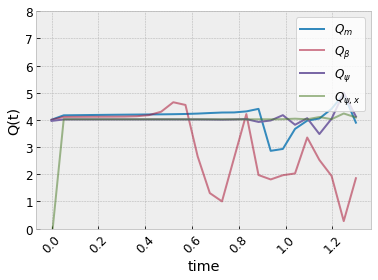

In [88]:
dt=dx
finaltime=(count-1)/8*step*dt
#plt_x = np.linspace(0, int(final_t/4)*dx*step*0.8, int(final_t/4))
plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))

with plt.style.context('ggplot'):
    plt.plot(plt_x, Q_m, label = '$Q_m$')
    plt.plot(plt_x, Q_beta, label = '$Q_{\\beta}$',alpha=0.5)
    plt.plot(plt_x, Q_psi, label = '$Q_{\psi}$')
    plt.plot(plt_x, Q_derpsi, label = '$Q_{\psi,r}$',alpha=0.5)
    

plt.ylim([0, 8])

plt.legend(loc ="upper right")
plt.xticks(rotation=45)
plt.xlabel('Proper time u')
plt.ylabel('Q(t)')
#plt.savefig("myImage.png", format="png", dpi=2000,bbox_inches='tight')
plt.show()

# Fixed grid and changing timestep

In [91]:
time_arrays=[]
for resolution in res:
    with pd.option_context('display.precision', 20):
        df = pd.read_csv("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/timearray{}.csv".format(resolution), header=None, dtype = str)
        df = df.to_numpy()
        df = np.transpose(df)
        aux = [float(x) for x in df[0]]
        time_arrays.append(aux)

In [108]:
aux=[]
for i in range(0,len(time_arrays[1])):
    if i%2==0:
        aux.append(time_arrays[1][i])
aux       
np.subtract(time_arrays[0],aux)

array([ 0.00000000e+00, -3.46944695e-18, -3.46944695e-18, -3.46944695e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [109]:
#time_arrays[0]

In [110]:
x_i = 0
np.transpose(datam[0])[x_i] #this array is the value of m over time at gridpoint x_i

array([-1.46466297e-20,  4.05183323e-20,  2.02564244e-19,  6.14090671e-19,
        1.49424577e-18,  3.20702973e-18,  6.34156709e-18,  1.18317450e-17,
        2.11328282e-17,  3.64799764e-17,  6.12637563e-17,  1.00571800e-16,
        1.61965121e-16,  2.56584154e-16,  4.00715793e-16,  6.18001992e-16,
        9.42537115e-16,  1.42319107e-15,  2.12961583e-15,  3.16055380e-15,
        4.65528091e-15])

In [116]:
import scipy
interp_funcs_res2=[]
for x_i in range(3,len(dataderpsi[1][0])-3): #iterate over gridpoints on grid with res2, ignoring ghostpoints
    
    if x_i%2!=0:

        x=time_arrays[1]
        y = np.transpose(dataderpsi[1])[x_i]
        #print("x ", x)
        #print("y ", y)
        #print("   ")
        
        #f=interpolate.interp1d(x, y)
        spl_f = scipy.interpolate.splrep(x,y,k=5)
        
        interp_funcs_res2.append(spl_f)
        #plt.scatter(x,y)
        #plt.ylim([-0.002, 0.002])
        #plt.show()
        
interp_funcs_res4=[]
for x_i in range(3,len(dataderpsi[2][0])-3): #iterate over gridpoints on grid with res4, ignoring ghostpoints
    
    if (x_i+1)%4==0:
        
        x=time_arrays[2]
        y = np.transpose(dataderpsi[2])[x_i]
        #print("x ", x)
        #print("y ", y)
        #print("   ")
        
        #f=interpolate.interp1d(x, y)
        spl_f = scipy.interpolate.splrep(x,y,k=5)
        
        interp_funcs_res4.append(spl_f)

In [117]:

diffs_2_1=[]
diffs_4_2=[]

for j in range(0,len(dataderpsi[0])): #iterate on time
    aux2=[]
    aux4=[]
    
    for i in range(3,len(dataderpsi[0][0])-3): #iterate on grid with res1, ignore ghostpoints
        t=time_arrays[0][j]
        #print(t)
        #aux2.append(dataderpsi[0][j][i]-float(interp_funcs_res2[i-3](t)))
        #aux4.append(dataderpsi[0][j][i]-float(interp_funcs_res4[i-3](t)))
        aux2.append(dataderpsi[0][j][i]-float(scipy.interpolate.splev(t,interp_funcs_res2[i-3])))
        aux4.append(dataderpsi[0][j][i]-float(scipy.interpolate.splev(t,interp_funcs_res4[i-3])))
        
    #print(np.subtract(aux2,aux4))
    #print(aux4)
    diffs_2_1.append(aux2)
    diffs_4_2.append(aux4)

In [118]:
"""diffs_2_1=[]
diffs_4_2=[]

for j in range(0,len(dataderpsi[0])): #iterate on time
    aux2=[]
    aux4=[]
    
    for i in range(3,len(dataderpsi[0][0])-3): #iterate on grid with res1, ignore ghostpoints
        t=time_arrays[0][j]
        #print(t)
        aux2.append(dataderpsi[0][j][i]-float(interp_funcs_res2[i-3](t)))
        aux4.append(dataderpsi[0][j][i]-float(interp_funcs_res4[i-3](t)))
    #print(np.subtract(aux2,aux4))
    #print(aux4)
    diffs_2_1.append(aux2)
    diffs_4_2.append(aux4)"""

'diffs_2_1=[]\ndiffs_4_2=[]\n\nfor j in range(0,len(dataderpsi[0])): #iterate on time\n    aux2=[]\n    aux4=[]\n    \n    for i in range(3,len(dataderpsi[0][0])-3): #iterate on grid with res1, ignore ghostpoints\n        t=time_arrays[0][j]\n        #print(t)\n        aux2.append(dataderpsi[0][j][i]-float(interp_funcs_res2[i-3](t)))\n        aux4.append(dataderpsi[0][j][i]-float(interp_funcs_res4[i-3](t)))\n    #print(np.subtract(aux2,aux4))\n    #print(aux4)\n    diffs_2_1.append(aux2)\n    diffs_4_2.append(aux4)'

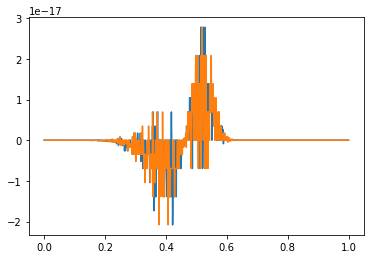

In [119]:
x=np.linspace(0,1,len(diffs_2_1[0]))
plt.plot(x,diffs_2_1[0])
x=np.linspace(0,1,len(diffs_4_2[0]))
plt.plot(x,diffs_4_2[0])

In [115]:
######## t=0 ########
normlow_med=0
for i in diffs_2_1[1]:
    normlow_med += i**2
normlow_med=math.sqrt(normlow_med)
normmed_high=0
for i in diffs_4_2[1]:
    normmed_high += i**2
normmed_high=math.sqrt(normmed_high)

math.log2(normlow_med/normmed_high)

-0.08683023373817983

In [327]:
len(diffs_2_1)

11

# ****

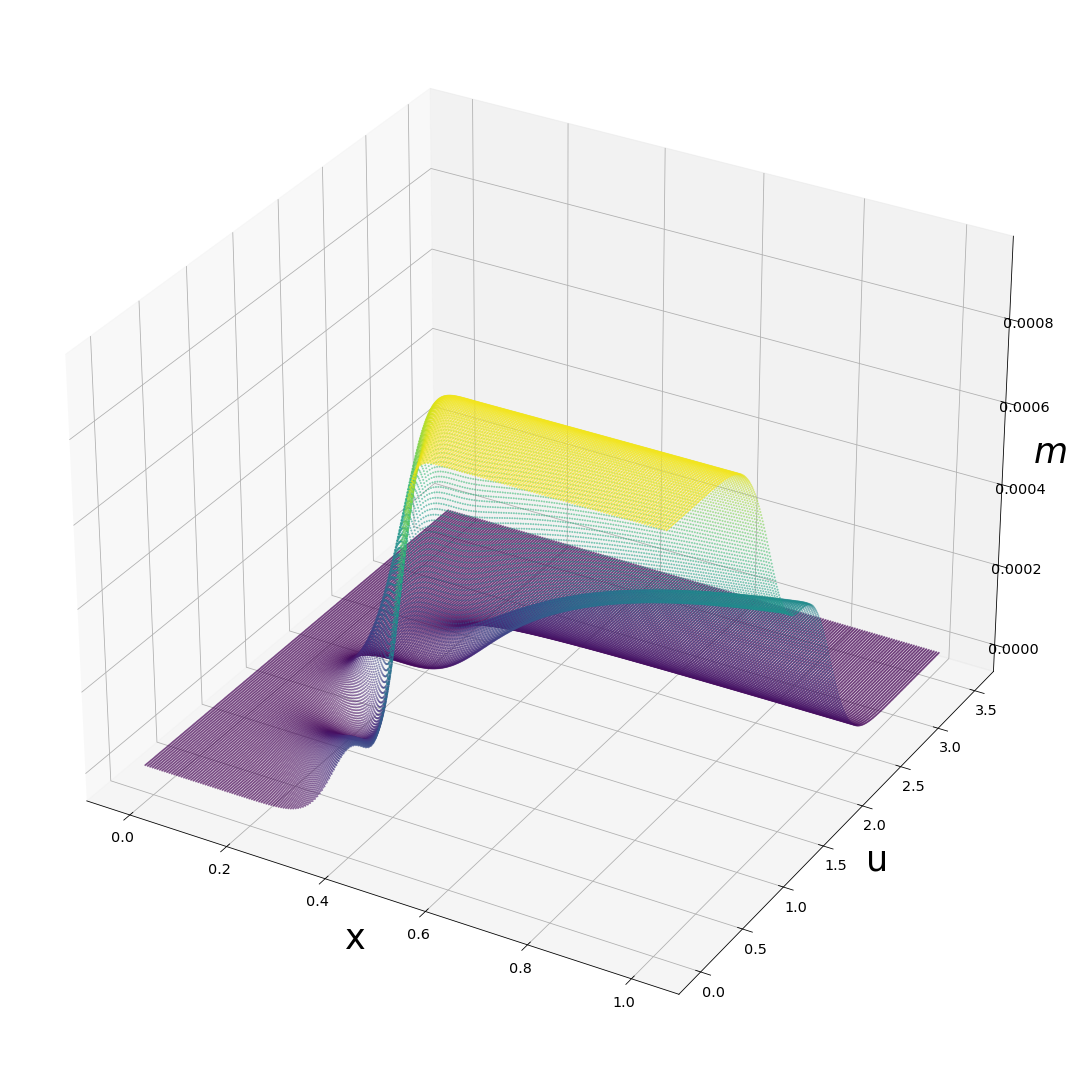

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#create x,y,z for scatter
z=[]
for i in range(0,len(derpsi)):
    for j in range(0,len(derpsi[i])):
        z.append(m[i][j])
        
x=[]
y=[]
for i in range(0,len(derpsi)):
    for j in range(0,len(derpsi[i])):
        x.append(grid[i][j])
        y.append(time[i])
        
        
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')


plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
with plt.style.context('ggplot'):
    ax.set_xlabel('x', fontsize = 35.0)
    ax.set_ylabel('u', fontsize = 35.0)
    ax.set_zlabel('$m$', fontsize = 35.0)
    
    ax.scatter(x, y, z,s=2,c=z,cmap='viridis',alpha=0.5)
    

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 8
plt.tight_layout()

plt.savefig("subcritical.pdf", format="pdf", bbox_inches="tight")
plt.show()


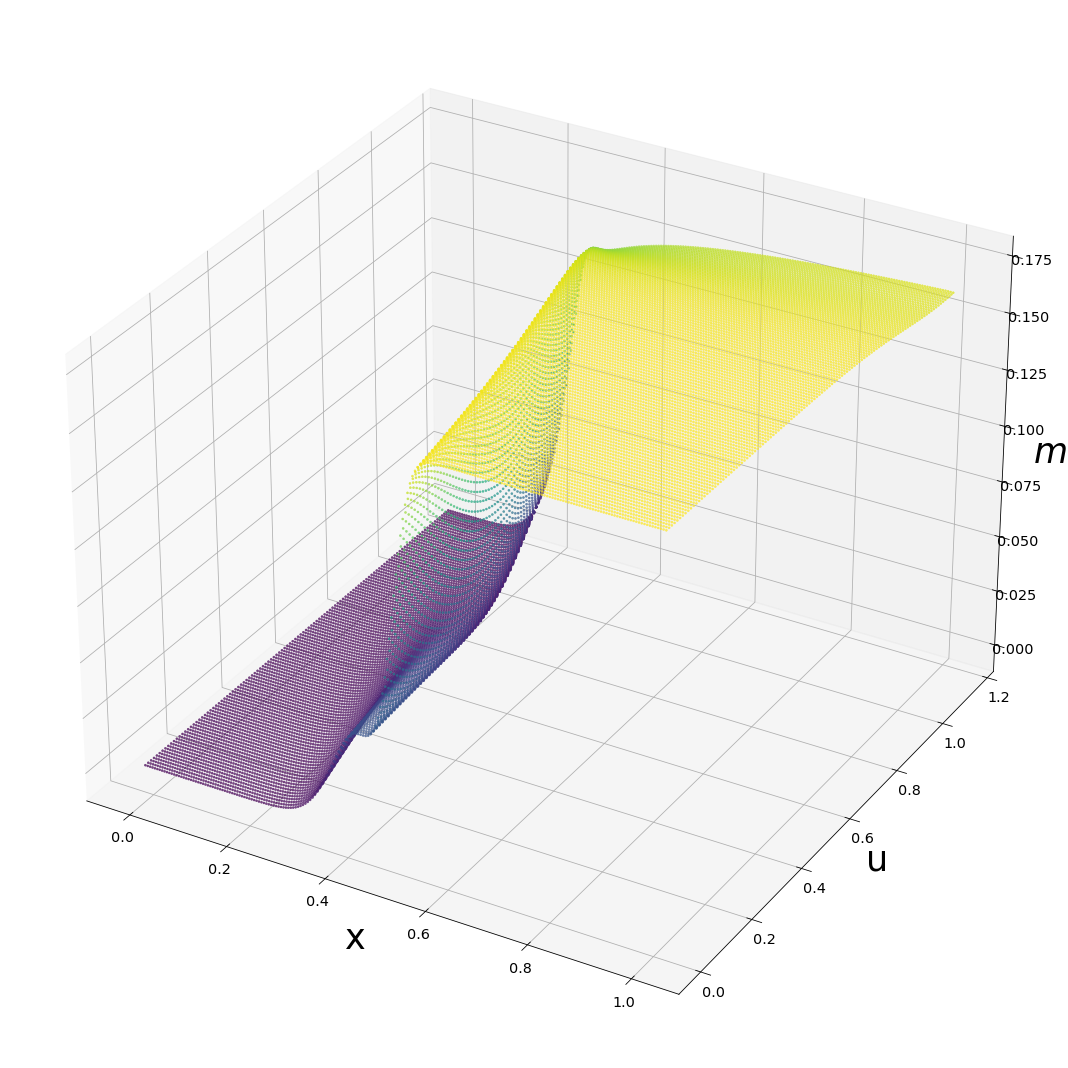

In [47]:
import matplotlib.pyplot as plt
import numpy as np

#create x,y,z for scatter
z=[]
for i in range(0,len(derpsi)):
    for j in range(0,len(derpsi[i])):
        z.append(m[i][j])
        
x=[]
y=[]
for i in range(0,len(derpsi)):
    for j in range(0,len(derpsi[i])):
        x.append(grid[i][j])
        y.append(time[i])
        
        
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')



# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
with plt.style.context('ggplot'):
    ax.set_xlabel('x', fontsize = 35.0)
    ax.set_ylabel('u', fontsize = 35.0)
    ax.set_zlabel('$m$', fontsize = 35.0)
    
    ax.scatter(x, y, z,s=4,c=z,cmap='viridis',alpha=0.7)

ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 8
plt.tight_layout()

plt.savefig("supercritical.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [84]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x, a, b, c):

    return a * np.exp(-b * x) + c

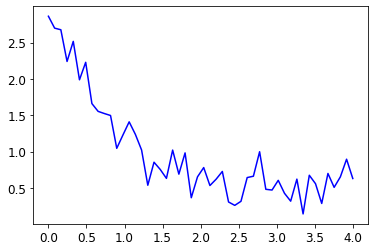

In [86]:
xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')


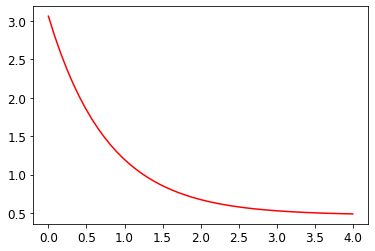

In [89]:
popt, pcov = curve_fit(func, xdata, ydata)

popt

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))